## Time-series based analysis of Earthquake Risk Factors

### Part 2: Cleaning the imported data and doing a brief EDA for early assessment. Finally pickling the merged dataframe into a global dataframe.

In this notebook, I cleaned the imported API dataframe and saved it as a clean version into "../datasets" folder for further processing.

Importing the required libraries:

- Built a general function to read USGS APIs: "get_EQ_USGS.py"

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

### Part 2.1: Importing the saved raw data from reddit API and cleaning

In [2]:
file_path = "../datasets/" + "eq_loma_prieta" + "_raw" + ".csv"

df_eq = pd.read_csv(file_path)
df_eq.drop(columns = "Unnamed: 0", inplace = True)
df_eq.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,dmin,rms,gap,magType,type,title,index,type.1,coordinates,index.1
0,1.42,Northern California,624757977010,1481291793752,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02342,0.03,70.0,md,earthquake,M 1.4 - Northern California,0,Point,"[-121.9451667, 37.1483333, 6.129]",0
1,1.85,Northern California,624757819750,1481291790238,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02523,0.05,74.0,md,earthquake,M 1.9 - Northern California,1,Point,"[-121.7233333, 36.965, 13.466]",1
2,1.98,Northern California,624757347610,1481291784960,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02973,0.07,55.0,md,earthquake,M 2.0 - Northern California,2,Point,"[-122.0328333, 37.1945, 11.406]",2
3,2.09,Northern California,624757074640,1481291775750,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02252,0.05,69.0,md,earthquake,M 2.1 - Northern California,3,Point,"[-121.8541667, 37.0925, 7.679]",3
4,1.65,Northern California,624756821010,1481291769900,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.03423,0.07,59.0,md,earthquake,M 1.7 - Northern California,4,Point,"[-121.6363333, 36.9855, 0.856]",4


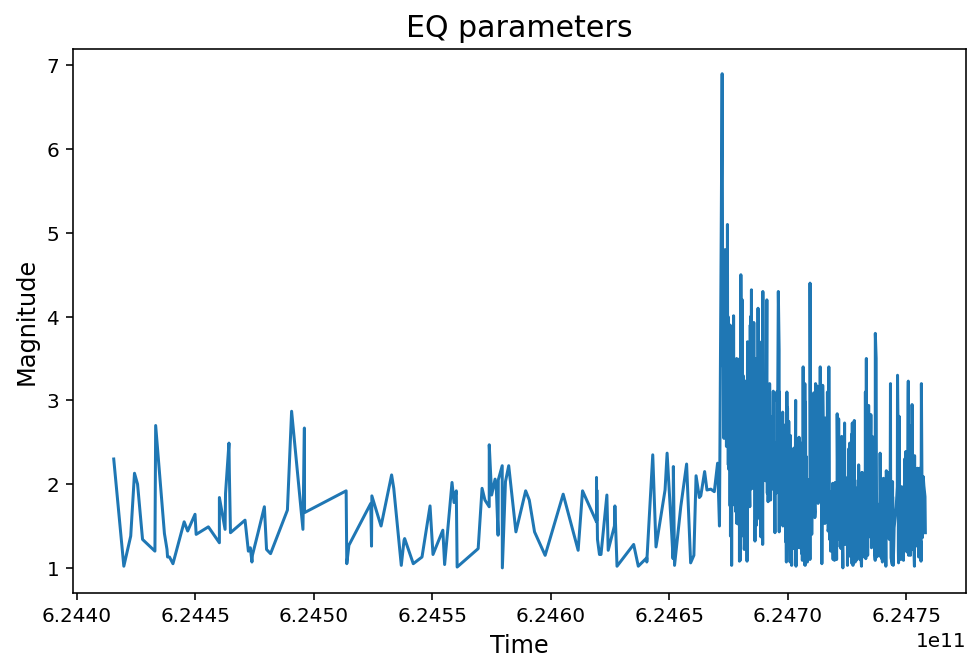

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.plot(df_eq.time,df_eq.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Time", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In [4]:
df_eq.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,dmin,rms,gap,magType,type,title,index,type.1,coordinates,index.1
0,1.42,Northern California,624757977010,1481291793752,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02342,0.03,70.0,md,earthquake,M 1.4 - Northern California,0,Point,"[-121.9451667, 37.1483333, 6.129]",0
1,1.85,Northern California,624757819750,1481291790238,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02523,0.05,74.0,md,earthquake,M 1.9 - Northern California,1,Point,"[-121.7233333, 36.965, 13.466]",1
2,1.98,Northern California,624757347610,1481291784960,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02973,0.07,55.0,md,earthquake,M 2.0 - Northern California,2,Point,"[-122.0328333, 37.1945, 11.406]",2
3,2.09,Northern California,624757074640,1481291775750,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.02252,0.05,69.0,md,earthquake,M 2.1 - Northern California,3,Point,"[-121.8541667, 37.0925, 7.679]",3
4,1.65,Northern California,624756821010,1481291769900,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,0.03423,0.07,59.0,md,earthquake,M 1.7 - Northern California,4,Point,"[-121.6363333, 36.9855, 0.856]",4


# Step 2: importing the coordinates

In [5]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mag          1038 non-null   float64
 1   place        1038 non-null   object 
 2   time         1038 non-null   int64  
 3   updated      1038 non-null   int64  
 4   tz           3 non-null      float64
 5   url          1038 non-null   object 
 6   detail       1038 non-null   object 
 7   felt         1 non-null      float64
 8   cdi          1 non-null      float64
 9   mmi          1 non-null      float64
 10  alert        0 non-null      float64
 11  status       1038 non-null   object 
 12  tsunami      1038 non-null   int64  
 13  sig          1038 non-null   int64  
 14  net          1038 non-null   object 
 15  code         1038 non-null   object 
 16  ids          1038 non-null   object 
 17  sources      1038 non-null   object 
 18  types        1038 non-null   object 
 19  nst   

Cleaning the dataframe:

In [6]:

# Getting only the useful columns
df_eq_clean = df_eq[['index', 'type', "time", "coordinates", "mag", "place", "status", "tsunami", "sig", "net", 
                 "nst", "dmin", "rms", "gap", "magType"]].copy()

# Parsing the coordinates

long = [] 
lat =[] 
dep = []

for i in range(len(df_eq_clean)):
    
    coord_values = df_eq_clean["coordinates"][i].replace("[", "").replace("]", "").replace(",", "").split()
    
    long.append(float(coord_values[0]))
    lat.append(float(coord_values[1]))
    dep.append(float(coord_values[2]))

df_eq_clean["longitude"] = long
df_eq_clean["latitude"] = lat
df_eq_clean["depth"] = dep

#Fixing time
time = pd.to_datetime(df_eq_clean["time"], unit="ms") 

df_eq_clean["time"] = time


#Droppinguseless coordinate column

df_eq_clean.drop(columns = "coordinates", inplace = True)

df_eq_clean.head()

,index,type,time,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth
0,0,earthquake,1989-10-18 23:52:57.010,1.42,Northern California,reviewed,0,31,nc,11.0,0.02342,0.03,70.0,md,-121.945167,37.148333,6.129
1,1,earthquake,1989-10-18 23:50:19.750,1.85,Northern California,reviewed,0,53,nc,22.0,0.02523,0.05,74.0,md,-121.723333,36.965000,13.466
2,2,earthquake,1989-10-18 23:42:27.610,1.98,Northern California,reviewed,0,60,nc,35.0,0.02973,0.07,55.0,md,-122.032833,37.194500,11.406
3,3,earthquake,1989-10-18 23:37:54.640,2.09,Northern California,reviewed,0,67,nc,28.0,0.02252,0.05,69.0,md,-121.854167,37.092500,7.679
4,4,earthquake,1989-10-18 23:33:41.010,1.65,Northern California,reviewed,0,42,nc,17.0,0.03423,0.07,59.0,md,-121.636333,36.985500,0.856


In [7]:
df_eq_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      1038 non-null   int64         
 1   type       1038 non-null   object        
 2   time       1038 non-null   datetime64[ns]
 3   mag        1038 non-null   float64       
 4   place      1038 non-null   object        
 5   status     1038 non-null   object        
 6   tsunami    1038 non-null   int64         
 7   sig        1038 non-null   int64         
 8   net        1038 non-null   object        
 9   nst        1037 non-null   float64       
 10  dmin       997 non-null    float64       
 11  rms        1037 non-null   float64       
 12  gap        1037 non-null   float64       
 13  magType    1038 non-null   object        
 14  longitude  1038 non-null   float64       
 15  latitude   1038 non-null   float64       
 16  depth      1038 non-null   float64       


The datatypes look good !

In [8]:
file_path = "../datasets/" + "eq_loma_prieta" + "_clean" + ".csv"
df_eq_clean.to_csv(file_path)